In [240]:
# -*- coding: UTF-8 -*-
# using python 2.7

import re
import emoji
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

%matplotlib inline

In [2]:
age_profiles = pd.read_json('assignment_package/age_profiles.json')

In [3]:
age_profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 41 columns):
contributors_enabled                  2410 non-null bool
created_at                            2410 non-null datetime64[ns]
default_profile                       2410 non-null bool
default_profile_image                 2410 non-null bool
description                           2410 non-null object
entities                              2410 non-null object
favourites_count                      2410 non-null int64
follow_request_sent                   2410 non-null bool
followers_count                       2410 non-null int64
following                             2410 non-null bool
friends_count                         2410 non-null int64
geo_enabled                           2410 non-null bool
id                                    2410 non-null int64
id_str                                2410 non-null int64
is_translation_enabled                2410 non-null bool
is_translator      

In [4]:
age_profiles.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,id,id_str,is_translation_enabled,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,url,utc_offset,verified
0,False,2012-06-19 17:54:58,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7931,False,274,False,264,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,"{u'contributors': None, u'truncated': False, u...",12230,Atlantic Time (Canada),None,-10800.0,False
1,False,2012-02-12 22:36:17,False,False,"If you like me, i probably like you more. {IG:...",{u'description': {u'urls': []}},1141,False,481,False,527,True,490791079,490791079,False,False,en,1,9⃣3⃣7⃣,Guff✌️,False,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,False,https://pbs.twimg.com/profile_banners/49079107...,http://pbs.twimg.com/profile_images/5097227545...,https://pbs.twimg.com/profile_images/509722754...,2FC2EF,181A1E,252429,666666,True,False,C_Guffieee,"{u'lang': u'en', u'favorited': False, u'contri...",14680,Hawaii,None,-36000.0,False
2,False,2011-03-11 21:44:56,False,False,Success doesn’t come to you…you go to it.,{u'description': {u'urls': []}},174,False,878,False,953,False,264416315,264416315,False,False,en,2,Wonderland,Starqueria.⚓,False,FCEBB6,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/26441631...,http://pbs.twimg.com/profile_images/5127311352...,https://pbs.twimg.com/profile_images/512731135...,CE7834,F0A830,78C0A8,5E412F,True,False,_Starqueria,"{u'contributors': None, u'truncated': False, u...",22857,Hawaii,None,-36000.0,False
3,False,2009-12-17 20:08:55,False,False,NEVER care about what a person says that doesn...,{u'description': {u'urls': []}},303,False,742,False,701,False,97515432,97515432,False,False,en,30,•Carolina South• 843•,. keeleesha,False,131516,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,NaN,http://pbs.twimg.com/profile_images/4939742059...,https://pbs.twimg.com/profile_images/493974205...,009999,FFFFFF,EFEFEF,333333,True,False,Keeleesha,"{u'contributors': None, u'truncated': False, u...",71654,Eastern Time (US & Canada),None,-14400.0,False
4,False,2011-03-24 21:14:53,False,False,these niggas some haters & i made myself so ea...,{u'description': {u'urls': []}},52,False,729,False,688,False,271608323,271608323,False,False,en,0,Seven•five•Seven,killakee :),False,0A0A0A,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/27160832...,http://pbs.twimg.com/profile_images/4627093362...,https://pbs.twimg.com/profile_images/462709336...,D62D0F,000000,000000,A3A3A3,True,False,KeeLashawn_,"{u'contributors': None, u'truncated': False, u...",48452,Eastern Time (US & Canada),None,-14400.0,False


In [5]:
age_profiles.describe()

,favourites_count,followers_count,friends_count,id,id_str,listed_count,statuses_count,utc_offset
count,2410.000000,2410.000000,2410.000000,2.410000e+03,2.410000e+03,2410.000000,2410.000000,1697.000000
mean,1800.120332,944.855187,689.358921,6.918280e+08,6.918280e+08,5.470124,16982.506224,-12402.710666
std,3884.458445,7083.829476,4970.227333,7.953757e+08,7.953757e+08,34.984290,25033.534126,15420.244205
min,0.000000,0.000000,-69.000000,2.025381e+06,2.025381e+06,0.000000,0.000000,-39600.000000
25%,103.000000,160.000000,179.000000,1.592982e+08,1.592982e+08,0.000000,1960.250000,-18000.000000
50%,543.000000,348.000000,340.000000,3.508023e+08,3.508023e+08,1.000000,7408.500000,-18000.000000
75%,1949.500000,700.250000,628.000000,8.804243e+08,8.804243e+08,3.000000,21565.250000,-10800.000000
max,99169.000000,258937.000000,202293.000000,2.832494e+09,2.832494e+09,1292.000000,257590.000000,43200.000000


## 1. Make   histograms   of   followers   count,   friends   count,   favorite   count,   and   status count,   all   of   which   are   in    age_profiles.csv .

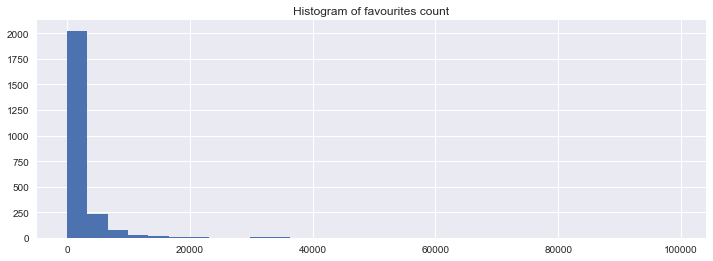

In [254]:
age_profiles.favourites_count.hist(bins=30, figsize=(12,4))
plt.title('Histogram of favourites count')

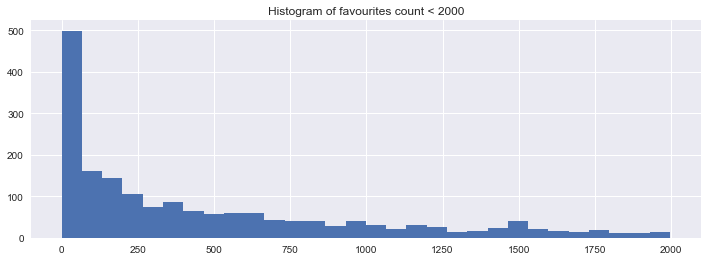

In [255]:
age_profiles[age_profiles['favourites_count']<2000]['favourites_count'].hist(bins=30, figsize=(12,4))
plt.title('Histogram of favourites count < 2000')

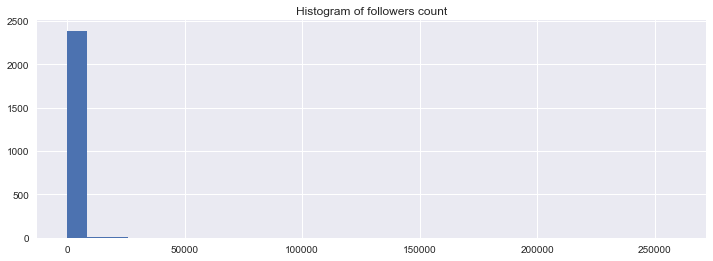

In [258]:
age_profiles.followers_count.hist(bins=30, figsize=(12,4))
plt.title('Histogram of followers count')

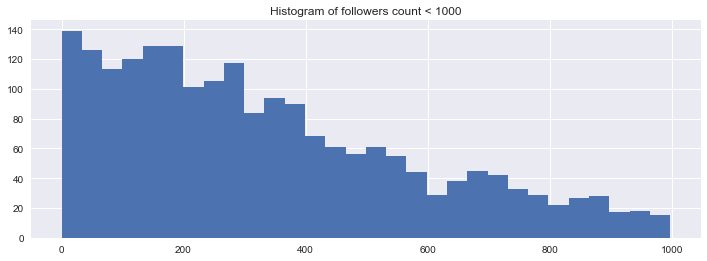

In [261]:
age_profiles[age_profiles['followers_count']<1000].followers_count.hist(bins=30, figsize=(12,4))
plt.title('Histogram of followers count < 1000')

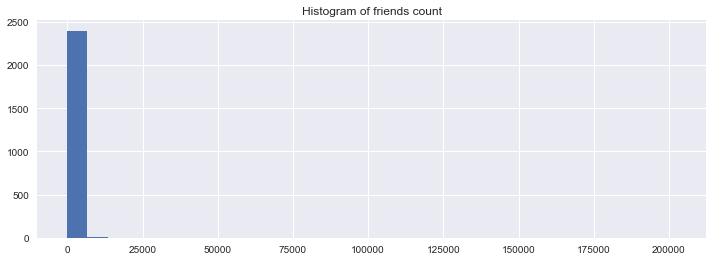

In [262]:
age_profiles.friends_count.hist(bins=30, figsize=(12,4))
plt.title('Histogram of friends count')

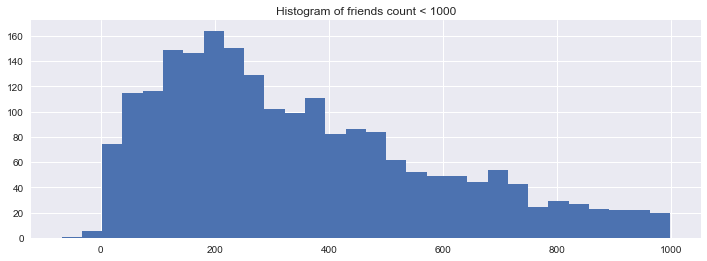

In [259]:
age_profiles[age_profiles['friends_count']<1000].friends_count.hist(bins=30, figsize=(12,4))
plt.title('Histogram of friends count < 1000')

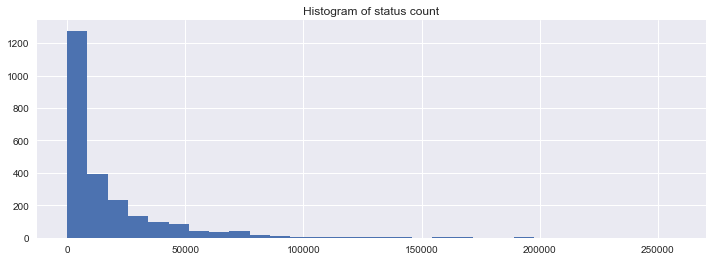

In [263]:
age_profiles.statuses_count.hist(bins=30, figsize=(12,4))
plt.title('Histogram of status count')

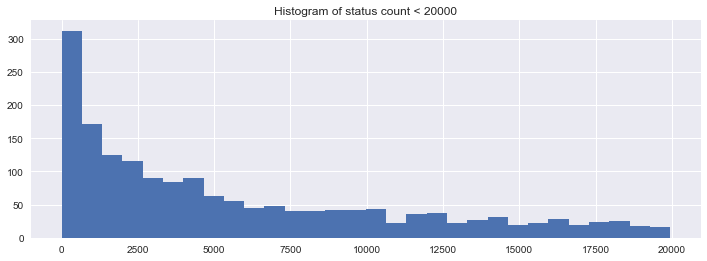

In [267]:
age_profiles[age_profiles['statuses_count']<20000]['statuses_count'].hist(bins=30, figsize=(12,4))
plt.title('Histogram of status count < 20000')

In [13]:
age_profiles[['favourites_count','followers_count', 'friends_count', 'statuses_count']].corr()

,favourites_count,followers_count,friends_count,statuses_count
favourites_count,1.000000,0.020342,0.002715,0.171091
followers_count,0.020342,1.000000,0.935946,0.077311
friends_count,0.002715,0.935946,1.000000,0.030932
statuses_count,0.171091,0.077311,0.030932,1.000000


Insights: 
1. Friends and followers are strongly correlated, with a correlation of 0.9359.
2. Statuses_count and favourites_count are extremely weakly correlated, with a correlation of 0.1711.
3. statuses_count and followers_count/friends_count are extremely weakly correlated, with a correlation of 0.0773 and 0.0309.

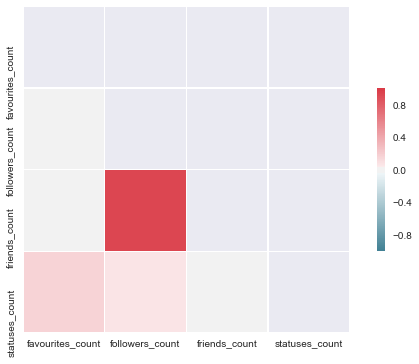

In [14]:
corr = age_profiles[['favourites_count','followers_count', 'friends_count', 'statuses_count']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 2. Which   time   zone   has   the   highest   proportion   of   known   iOS   users   in age_profiles.csv ?      Which   time   zone   has   the   highest   proportion   of   Android   users?

In [15]:
age_tweets = pd.read_json('assignment_package/age_tweets.json')

In [16]:
age_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28138 entries, 0 to 28137
Data columns (total 25 columns):
contributors                 0 non-null float64
coordinates                  1298 non-null object
created_at                   28138 non-null datetime64[ns]
entities                     28138 non-null object
favorite_count               28138 non-null int64
favorited                    28138 non-null bool
geo                          1298 non-null object
id                           28138 non-null int64
id_str                       28138 non-null int64
in_reply_to_screen_name      5299 non-null object
in_reply_to_status_id        4839 non-null float64
in_reply_to_status_id_str    4839 non-null float64
in_reply_to_user_id          5299 non-null float64
in_reply_to_user_id_str      5299 non-null float64
lang                         28138 non-null object
metadata                     28138 non-null object
place                        1341 non-null object
possibly_sensitive          

In [227]:
age_tweets.head()

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,lang,metadata,place,possibly_sensitive,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,None,2014-09-26 05:55:45,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,515379174454747136,515379174454747136,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,7,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @AlenaBacalia: i over think and second gues...,False,"{u'follow_request_sent': False, u'profile_use_..."
1,NaN,None,2014-09-26 05:58:17,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,515379813670854656,515379813670854656,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,80,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @hfholden34: I've wasted too much time on t...,False,"{u'follow_request_sent': False, u'profile_use_..."
2,NaN,None,2014-09-26 05:59:47,"{u'symbols': [], u'user_mentions': [], u'hasht...",1,False,None,515380190361288704,515380190361288704,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,1,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I'm already gone.,False,"{u'follow_request_sent': False, u'profile_use_..."
3,NaN,None,2014-09-26 06:00:07,"{u'symbols': [], u'user_mentions': [], u'hasht...",1,False,None,515380273005854721,515380273005854720,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I'm already something to someone that I don't ...,False,"{u'follow_request_sent': False, u'profile_use_..."
4,NaN,None,2014-09-26 08:09:57,"{u'symbols': [], u'user_mentions': [], u'hasht...",1,False,None,515412946608852992,515412946608852992,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...","I don't know what I'm doing with my life, but ...",False,"{u'follow_request_sent': False, u'profile_use_..."


In [222]:
# age_tweets['user'].apply(pd.Series).rename(columns = lambda x: 'user_' + str(x))

In [18]:
# new_df = pd.concat([age_tweets.drop('user', axis=1), 
#                     pd.DataFrame(age_tweets['user'].apply(pd.Series).rename(columns = lambda x: 'user_' + str(x)))], 
#                     axis=1)

In [269]:
# Create a new age_profiles dataframe that extracts info from "status" column:
age_profiles_new = pd.concat([age_profiles, 
                              pd.DataFrame(age_profiles['status'].apply(pd.Series) \
                                           .rename(columns = lambda x: 'status_' + str(x)))], axis=1)

In [270]:
# new_df.head()

In [271]:
age_profiles_new.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,id,id_str,is_translation_enabled,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,url,utc_offset,verified,status_0,status_contributors,status_coordinates,status_created_at,status_entities,status_favorite_count,status_favorited,status_geo,status_id,status_id_str,status_in_reply_to_screen_name,status_in_reply_to_status_id,status_in_reply_to_status_id_str,status_in_reply_to_user_id,status_in_reply_to_user_id_str,status_lang,status_place,status_possibly_sensitive,status_retweet_count,status_retweeted,status_retweeted_status,status_source,status_text,status_truncated
0,False,2012-06-19 17:54:58,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7931,False,274,False,264,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,"{u'contributors': None, u'truncated': False, u...",12230,Atlantic Time (Canada),None,-10800.0,False,NaN,NaN,None,Fri Sep 26 16:49:37 +0000 2014,"{u'user_mentions': [{u'indices': [3, 14], u'id...",0.0,False,None,5.155437e+17,515543724785684480,None,NaN,None,NaN,None,en,None,NaN,452.0,False,"{u'lang': u'en', u'favorited': False, u'contri...","<a href=""http://twitter.com/download/android"" ...",RT @DogeTheDog: Wow\n So friday\n ...,False
1,False,2012-02-12 22:36:17,False,False,"If you like me, i probably like you more. {IG:...",{u'description': {u'urls': []}},1141,False,481,False,527,True,490791079,490791079,False,False,en,1,9⃣3⃣7⃣,Guff✌️,False,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,False,https://pbs.twimg.com/profile_banners/49079107...,http://pbs.twimg.com/profile_images/5097227545...,https://pbs.twimg.com/profile_images/509722754...,2FC2EF,181A1E,252429,666666,True,False,C_Guffieee,"{u'lang': u'en', u'favorited': False, u'contri...",14680,Hawaii,None,-36000.0,False,NaN,NaN,None,Fri Sep 26 17:42:07 +0000 2014,"{u'user_mentions': [], u'symbols': [], u'hasht...",0.0,False,None,5.155569e+17,515556938512609280,None,NaN,None,NaN,None,en,None,NaN,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Damn I gotta wait to next week to get the IPho...,False
2,False,2011-03-11 21:44:56,False,False,Success doesn’t come to you…you go to it.,{u'description': {u'urls': []}},174,False,878,False,953,False,264416315,264416315,False,False,en,2,Wonderland,Starqueria.⚓,False,FCEBB6,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/26441631...,http://pbs.twimg.com/profile_images/5127311352...,https://pbs.twimg.com/profile_images/512731135...,CE7834,F0A830,78C0A8,5E412F,True,False,_Starqueria,"{u'contributors': None, u'truncated': False, u...",22857,Hawaii,None,-36000.0,False,NaN,NaN,None,Fri Sep 26 02:57:32 +0000 2014,"{u'user_mentions': [{u'indices': [3, 18], u'id...",0.0,False,None,5.153343e+17,515334328113307649,None,NaN,None,NaN,None,en,None,False,2614.0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/android"" ...",RT @ImNeverChillin: How your girl look at you ...,False
3,False,2009-12-17 20:08:55,False,False,NEVER care about what a 

In [27]:
# # parse html in original source column:
# for i in xrange(len(new_df.source)):
#     soup = BeautifulSoup(new_df.source[i], 'html.parser')
#     new_df.loc[i, 'source_parsed'] = soup.text    

In [277]:
# parse html in original source column:
for i in xrange(len(new_df.source)):
    soup = BeautifulSoup(str(age_profiles_new.status_source)[i], 'html.parser')
    age_profiles_new.loc[i, 'source_parsed'] = soup.text  

//anaconda/lib/python2.7/site-packages/bs4/__init__.py:219: UserWarning: "/" looks like a filename, not markup. You shouldprobably open this file and pass the filehandle intoBeautiful Soup.
  'Beautiful Soup.' % markup)
//anaconda/lib/python2.7/site-packages/bs4/__init__.py:219: UserWarning: "." looks like a filename, not markup. You shouldprobably open this file and pass the filehandle intoBeautiful Soup.
  'Beautiful Soup.' % markup)


In [278]:
age_profiles_new.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,id,id_str,is_translation_enabled,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,url,utc_offset,verified,status_0,status_contributors,status_coordinates,status_created_at,status_entities,status_favorite_count,status_favorited,status_geo,status_id,status_id_str,status_in_reply_to_screen_name,status_in_reply_to_status_id,status_in_reply_to_status_id_str,status_in_reply_to_user_id,status_in_reply_to_user_id_str,status_lang,status_place,status_possibly_sensitive,status_retweet_count,status_retweeted,status_retweeted_status,status_source,status_text,status_truncated,source_parsed
0,False,2012-06-19 17:54:58,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7931.0,False,274.0,False,264.0,True,612815277.0,612815277.0,False,False,en,1.0,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,"{u'contributors': None, u'truncated': False, u...",12230.0,Atlantic Time (Canada),None,-10800.0,False,NaN,NaN,None,Fri Sep 26 16:49:37 +0000 2014,"{u'user_mentions': [{u'indices': [3, 14], u'id...",0.0,False,None,5.155437e+17,515543724785684480,None,NaN,None,NaN,None,en,None,NaN,452.0,False,"{u'lang': u'en', u'favorited': False, u'contri...","<a href=""http://twitter.com/download/android"" ...",RT @DogeTheDog: Wow\n So friday\n ...,False,0
1,False,2012-02-12 22:36:17,False,False,"If you like me, i probably like you more. {IG:...",{u'description': {u'urls': []}},1141.0,False,481.0,False,527.0,True,490791079.0,490791079.0,False,False,en,1.0,9⃣3⃣7⃣,Guff✌️,False,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,False,https://pbs.twimg.com/profile_banners/49079107...,http://pbs.twimg.com/profile_images/5097227545...,https://pbs.twimg.com/profile_images/509722754...,2FC2EF,181A1E,252429,666666,True,False,C_Guffieee,"{u'lang': u'en', u'favorited': False, u'contri...",14680.0,Hawaii,None,-36000.0,False,NaN,NaN,None,Fri Sep 26 17:42:07 +0000 2014,"{u'user_mentions': [], u'symbols': [], u'hasht...",0.0,False,None,5.155569e+17,515556938512609280,None,NaN,None,NaN,None,en,None,NaN,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Damn I gotta wait to next week to get the IPho...,False,
2,False,2011-03-11 21:44:56,False,False,Success doesn’t come to you…you go to it.,{u'description': {u'urls': []}},174.0,False,878.0,False,953.0,False,264416315.0,264416315.0,False,False,en,2.0,Wonderland,Starqueria.⚓,False,FCEBB6,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/26441631...,http://pbs.twimg.com/profile_images/5127311352...,https://pbs.twimg.com/profile_images/512731135...,CE7834,F0A830,78C0A8,5E412F,True,False,_Starqueria,"{u'contributors': None, u'truncated': False, u...",22857.0,Hawaii,None,-36000.0,False,NaN,NaN,None,Fri Sep 26 02:57:32 +0000 2014,"{u'user_mentions': [{u'indices': [3, 18], u'id...",0.0,False,None,5.153343e+17,515334328113307649,None,NaN,None,NaN,None,en,None,False,2614.0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/android"" ...",RT @ImNeverChillin: How your girl look at you ...,False,
3,Fa

In [29]:
# List of all sources: 
new_df.source_parsed.value_counts()

Twitter for iPhone             15440
Twitter for Android             5093
Instagram                       1503
Twitter Web Client              1414
IFTTT                            481
Echofon                          422
Twitter for iPad                 345
Twittascope                      334
Twitter for Windows Phone        297
Mobile Web (M5)                  243
Facebook                         211
Twitter for BlackBerry®          209
TweetCaster for Android          179
Plume for Android                176
Twitter for Android Tablets      139
Tweetbot for iΟS                 130
Tweetlogix                       116
iOS                              111
Unfollowers.me                   106
TweetDeck                         96
Mobile Web (M2)                   96
Twitter for Websites              82
Cloudhopper                       59
fllwrs                            57
Tumblr                            56
dlvr.it                           55
Twitter for BlackBerry            53
P

In [33]:
# how many users are there in age_profiles?
age_profiles.id.nunique()

2410

In [32]:
# how many users are there in age_tweets?
new_df.user_id.nunique()

2195

In [42]:
# define ios devices:
ios = ['Twitter for iPhone', 'Twitter for iPad', 'iOS', 'Twitter for Mac', 'Tweetbot for Mac',
       'TweetCaster for iOS', 'Tweetbot for iΟS', 'Osfoora for iOS', 'UberSocial for iPhone', 'OS X',
       'Instagram on iOS', '8 Ball Pool™ on iOS', 'Photos on iOS']

In [43]:
# define Android devices:
android = ['Twitter for Android', 'TweetCaster for Android', 'Plume for Android',
          'Twitter for Android Tablets', 'Twitter for  Android', 'UberSocial for Android',
          'Vine for Android', 'Fenix for Android', 'Echofon  Android']

In [65]:
# create a new column as source_ios, in order to get proportion
new_df['source_ios'] = (new_df['source_parsed'].isin(ios)).astype(int)
new_df['source_android'] = (new_df['source_parsed'].isin(android)).astype(int)

In [66]:
new_df.head()

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,lang,metadata,place,possibly_sensitive,retweet_count,retweeted,retweeted_status,source,text,truncated,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,user_listed_count,user_location,user_name,user_notifications,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_url,user_utc_offset,user_verified,source_parsed,source_ios,source_android
0,NaN,None,2014-09-26 05:55:45,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,515379174454747136,515379174454747136,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,7,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @AlenaBacalia: i over think and second gues...,False,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False,Twitter for iPhone,1,0
1,NaN,None,2014-09-26 05:58:17,"{u'symbols': [], u'user_mentions': [{u'indices...",0,False,None,515379813670854656,515379813670854656,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,80,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @hfholden34: I've wasted too much time on t...,False,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),None,-10800.0,False,Twitter for iPhone,1,0
2,NaN,None,2014-09-26 05:59:47,"{u'symbols': [], u'user_mentions': [], u'hasht...",1,False,None,515380190361288704,515380190361288704,None,NaN,NaN,NaN,NaN,en,"{u'iso_language_code': u'en', u'result_type': ...",None,NaN,1,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",I'm already gone.,False,False,Tue Jun 19 17:54:58 +0000 2012,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7937,False,273,False,265,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,12236,Atlantic Time (Canada),N

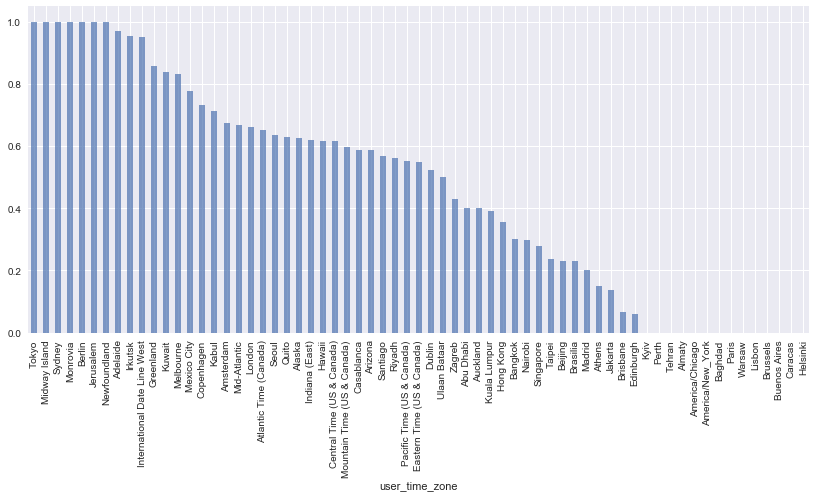

In [84]:
(new_df['source_ios'].groupby(new_df['user_time_zone']).sum() / 
new_df['source_ios'].groupby(new_df['user_time_zone']).count()).sort_values(ascending=False) \
.plot(kind='bar', figsize=(14,6), alpha=.7)

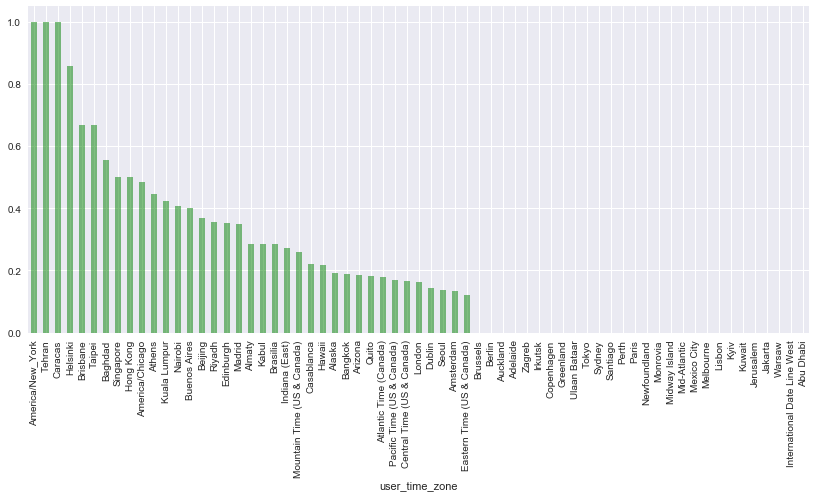

In [83]:
(new_df['source_android'].groupby(new_df['user_time_zone']).sum() / 
new_df['source_android'].groupby(new_df['user_time_zone']).count()).sort_values(ascending=False)\
.plot(kind='bar', figsize=(14,6), color='g', alpha=.5)

**Reason:** time_zone input is messy, "America/New_York" is actually the same with "Eastern Time", "America/New_York" only has 15 data points, and all of them are from Android devices. In order to get more accurate result, more data cleaning work need to be done.

## 3. Use   the   “mentions”   data   in    mentions.csv    to   come   up   with   a   list   of   Twitter   handles that   were   mentioned   by   more   than   one   user.

In [88]:
mentions = pd.read_csv('assignment_package/mentions.csv')

In [89]:
mentions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17695 entries, 0 to 17694
Data columns (total 3 columns):
ID                 17695 non-null int64
MentionedID        17695 non-null int64
MentionedHandle    17695 non-null object
dtypes: int64(2), object(1)
memory usage: 414.8+ KB


In [90]:
mentions.head()

,ID,MentionedID,MentionedHandle
0,612815277,798747864,AlenaBacalia
1,612815277,354590068,hfholden34
2,612815277,401111769,MarilynYousif
3,612815277,35581752,heeeeyerin
4,612815277,1591956090,DogeTheDog


In [302]:
# Twitter handles that have been mentioned by more than 1 user (By handle):
handles = mentions.groupby('MentionedHandle')['ID'].nunique() > 1
h1 = handles.reset_index()
h2 = h1[h1['ID']==True]

In [305]:
mentions['MentionedHandle'].nunique()

10746

In [315]:
agg_by_handle = h2['MentionedHandle']
agg_by_handle.to_csv('mentioned_more_than_one.csv', index=False)

- **Question:** Build a list of the top 20 handles(rank by greatest number of unique users mentioning a given handle).

In [189]:
mentions.groupby('MentionedHandle')['ID'].nunique().sort_values(ascending=False).nlargest(n=20)

MentionedHandle
girlposts          32
Sexualgif          30
SportsCenter       24
YouTube            22
BabyAnimalPics     20
SoDamnTrue         19
RelatableQuote     18
UberFacts          17
CuteEmergency      17
WORIDSTARHlPHOP    17
WorldStarFunny     16
FunnyPicsDepot     16
HornyFacts         15
FIirtationship     15
AboutVirgos        14
TweetLikeAGirI     14
wizkhalifa         14
FreddyAmazin       14
EmWatson           13
Drrake             12
Name: ID, dtype: int64

In [320]:
list(mentions.groupby('MentionedHandle')['ID'].nunique().sort_values(ascending=False).nlargest(n=20).reset_index()['MentionedHandle'])

['girlposts',
 'Sexualgif',
 'SportsCenter',
 'YouTube',
 'BabyAnimalPics',
 'SoDamnTrue',
 'RelatableQuote',
 'UberFacts',
 'CuteEmergency',
 'WORIDSTARHlPHOP',
 'WorldStarFunny',
 'FunnyPicsDepot',
 'HornyFacts',
 'FIirtationship',
 'AboutVirgos',
 'TweetLikeAGirI',
 'wizkhalifa',
 'FreddyAmazin',
 'EmWatson',
 'Drrake']

- **Question:** Which   actor/actress   in   this   top   20   list   starred   in   the   Harry   Potter   movies, and   how   many   unique   users   mentioned   this   star’s   Twitter   handle?
- **Answer:** Emma Watson. 13 unique users have mentioned her in tweets in our data.

In [188]:
# One handle match with one ID, but one ID can match more than 1 handle
# people can change their handles, example: 
mentions[mentions['MentionedID'] == 2786430025]

,ID,MentionedID,MentionedHandle
159,154628162,2786430025,opnspirits
2800,1385365447,2786430025,sexpIoit
6348,173993294,2786430025,sexpIoit
13365,2500814748,2786430025,opnspirits


In [165]:
mentions[mentions['MentionedHandle'] == 'KinkyGifs']

,ID,MentionedID,MentionedHandle
16493,388611511,2577445704,KinkyGifs


In [166]:
# why KinkyGifs has only one record but was included in my 'r2'?
mentions[mentions['MentionedID'] == 2577445704]

,ID,MentionedID,MentionedHandle
934,448515595,2577445704,CraziestFreaks
935,448515595,2577445704,CraziestFreaks
1101,206444763,2577445704,CraziestFreaks
3241,403790784,2577445704,CraziestFreaks
4776,501025984,2577445704,CraziestFreaks
6846,2762236363,2577445704,CraziestFreaks
9119,386861037,2577445704,CraziestFreaks
9120,386861037,2577445704,CraziestFreaks
9121,386861037,2577445704,CraziestFreaks
9122,386861037,2577445704,CraziestFreaks


In [172]:
mentions_json = pd.read_json('assignment_package/mention_profiles.json')

## Break   down   the   sample   by   age-decade   (age   10-20,   20-30,   etc).

In [191]:
# Use ages_train.csv to obtain age info
ages_train = pd.read_csv('assignment_package/ages_train.csv')

In [322]:
ages_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 3 columns):
ID            1711 non-null int64
Age           1711 non-null int64
age_decade    1705 non-null category
dtypes: category(1), int64(2)
memory usage: 28.8 KB


In [192]:
ages_train.head()

,ID,Age
0,23605717,21
1,781084760,19
2,102262916,21
3,413710015,21
4,584304916,90


In [193]:
ages_train.describe()

,ID,Age
count,1.711000e+03,1711.000000
mean,6.933661e+08,22.210403
std,8.066845e+08,7.220109
min,2.025381e+06,18.000000
25%,1.467558e+08,19.000000
50%,3.406691e+08,21.000000
75%,8.865310e+08,22.000000
max,2.832494e+09,111.000000


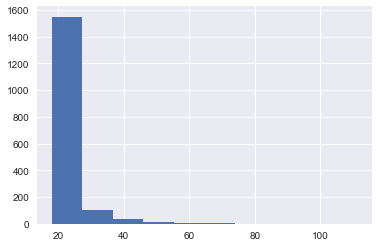

In [194]:
# max = 111 ?? check.
ages_train.Age.hist()

In [199]:
# some outliers...
ages_train[ages_train.Age > 80]

,ID,Age
4,584304916,90
452,394917207,94
988,75618870,87
1174,129959464,106
1316,2832494239,111


In [206]:
# remove outliers
ages_new = ages_train[ages_train['Age']<80]

In [213]:
# create a new column as age_decade:
bins = [10,20,30,40,50,60,70,80]
group_names = ['10-20','20-30','30-40','40-50','50-60','60-70','70-80']
ages_new['age_decade'] = pd.cut(ages_new['Age'], bins, labels=group_names)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


- Make   a   bar   chart   of   age   group   sample   size   (x-axis:   age   group,   y-axis:
per-group   sample   size)

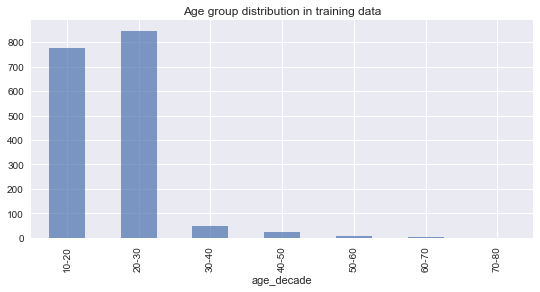

In [321]:
ages_new.groupby('age_decade')['ID'].count().plot(kind='bar', figsize=(9,4), alpha=.7)
plt.title('Age group distribution in training data')

- ** Which   age   group   uses   the   most   emojis   in   their   profile   status?**

In [228]:
age_profiles.status[1]

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Fri Sep 26 17:42:07 +0000 2014',
 u'entities': {u'hashtags': [],
  u'symbols': [],
  u'urls': [],
  u'user_mentions': []},
 u'favorite_count': 0,
 u'favorited': False,
 u'geo': None,
 u'id': 515556938512609280L,
 u'id_str': u'515556938512609280',
 u'in_reply_to_screen_name': None,
 u'in_reply_to_status_id': None,
 u'in_reply_to_status_id_str': None,
 u'in_reply_to_user_id': None,
 u'in_reply_to_user_id_str': None,
 u'lang': u'en',
 u'place': None,
 u'retweet_count': 0,
 u'retweeted': False,
 u'source': u'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 u'text': u'Damn I gotta wait to next week to get the IPhone 6.\U0001f612',
 u'truncated': False}

In [229]:
print '\U0001f612'.decode('unicode-escape')

😒


In [235]:
# age_profiles['status'].apply(pd.Series).rename(columns = lambda x: 'status_' + str(x))

In [234]:
# create a new age_profiles dataframe that extracts info from "status" column:
age_profiles_new = pd.concat([age_profiles, 
                              pd.DataFrame(age_profiles['status'].apply(pd.Series) \
                                           .rename(columns = lambda x: 'status_' + str(x)))], axis=1)

In [237]:
age_profiles_new.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,id,id_str,is_translation_enabled,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,status,statuses_count,time_zone,url,utc_offset,verified,status_0,status_contributors,status_coordinates,status_created_at,status_entities,status_favorite_count,status_favorited,status_geo,status_id,status_id_str,status_in_reply_to_screen_name,status_in_reply_to_status_id,status_in_reply_to_status_id_str,status_in_reply_to_user_id,status_in_reply_to_user_id_str,status_lang,status_place,status_possibly_sensitive,status_retweet_count,status_retweeted,status_retweeted_status,status_source,status_text,status_truncated
0,False,2012-06-19 17:54:58,False,False,You'll never find another one like me.,{u'description': {u'urls': []}},7931,False,274,False,264,True,612815277,612815277,False,False,en,1,,Greggy,False,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,https://abs.twimg.com/images/themes/theme14/bg...,True,https://pbs.twimg.com/profile_banners/61281527...,http://pbs.twimg.com/profile_images/4776662828...,https://pbs.twimg.com/profile_images/477666282...,009999,EEEEEE,EFEFEF,333333,True,False,agregtoremember,"{u'contributors': None, u'truncated': False, u...",12230,Atlantic Time (Canada),None,-10800.0,False,NaN,NaN,None,Fri Sep 26 16:49:37 +0000 2014,"{u'user_mentions': [{u'indices': [3, 14], u'id...",0.0,False,None,5.155437e+17,515543724785684480,None,NaN,None,NaN,None,en,None,NaN,452.0,False,"{u'lang': u'en', u'favorited': False, u'contri...","<a href=""http://twitter.com/download/android"" ...",RT @DogeTheDog: Wow\n So friday\n ...,False
1,False,2012-02-12 22:36:17,False,False,"If you like me, i probably like you more. {IG:...",{u'description': {u'urls': []}},1141,False,481,False,527,True,490791079,490791079,False,False,en,1,9⃣3⃣7⃣,Guff✌️,False,1A1B1F,http://abs.twimg.com/images/themes/theme9/bg.gif,https://abs.twimg.com/images/themes/theme9/bg.gif,False,https://pbs.twimg.com/profile_banners/49079107...,http://pbs.twimg.com/profile_images/5097227545...,https://pbs.twimg.com/profile_images/509722754...,2FC2EF,181A1E,252429,666666,True,False,C_Guffieee,"{u'lang': u'en', u'favorited': False, u'contri...",14680,Hawaii,None,-36000.0,False,NaN,NaN,None,Fri Sep 26 17:42:07 +0000 2014,"{u'user_mentions': [], u'symbols': [], u'hasht...",0.0,False,None,5.155569e+17,515556938512609280,None,NaN,None,NaN,None,en,None,NaN,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Damn I gotta wait to next week to get the IPho...,False
2,False,2011-03-11 21:44:56,False,False,Success doesn’t come to you…you go to it.,{u'description': {u'urls': []}},174,False,878,False,953,False,264416315,264416315,False,False,en,2,Wonderland,Starqueria.⚓,False,FCEBB6,http://pbs.twimg.com/profile_background_images...,https://pbs.twimg.com/profile_background_image...,True,https://pbs.twimg.com/profile_banners/26441631...,http://pbs.twimg.com/profile_images/5127311352...,https://pbs.twimg.com/profile_images/512731135...,CE7834,F0A830,78C0A8,5E412F,True,False,_Starqueria,"{u'contributors': None, u'truncated': False, u...",22857,Hawaii,None,-36000.0,False,NaN,NaN,None,Fri Sep 26 02:57:32 +0000 2014,"{u'user_mentions': [{u'indices': [3, 18], u'id...",0.0,False,None,5.153343e+17,515334328113307649,None,NaN,None,NaN,None,en,None,False,2614.0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/android"" ...",RT @ImNeverChillin: How your girl look at you ...,False
3,False,2009-12-17 20:08:55,False,False,NEVER care about what a 

In [ ]:
# emojis are usually found in profile status_text column, let's inspect:

In [248]:
ages_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 3 columns):
ID            1711 non-null int64
Age           1711 non-null int64
age_decade    1705 non-null category
dtypes: category(1), int64(2)
memory usage: 28.8 KB


In [249]:
ages_test = pd.read_csv('assignment_package/ages_test.csv')

In [250]:
ages_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 1 columns):
246677348    299 non-null int64
dtypes: int64(1)
memory usage: 2.4 KB
